<a href="https://colab.research.google.com/github/brauliosba/Machine-Learning---TA2/blob/main/TB2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
import os
import cv2
import copy
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
path = "/content/drive/My Drive/xray_dataset_covid19/NORMAL"
path2 = "/content/drive/My Drive/xray_dataset_covid19/PNEUMONIA"

In [67]:
images = []
labels = []

for item in sorted(os.listdir(path)):
    img = cv2.imread(path+"/"+item)
    images.append(img)
    labels.append(1)

for item in sorted(os.listdir(path2)):
    img = cv2.imread(path2+"/"+item)
    images.append(img)
    labels.append(0)

In [68]:
print(len(images))
print(len(labels))

188
188


In [70]:
df = pd.DataFrame({'image': images, 'label': labels})

In [72]:
df = df.sample(frac=1)

In [73]:
df

,image,label
66,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
83,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
78,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
106,"[[[19, 19, 19], [24, 24, 24], [25, 25, 25], [3...",0
24,"[[[1, 1, 1], [15, 15, 15], [16, 16, 16], [13, ...",1
...,...,...
186,"[[[1, 1, 1], [19, 19, 19], [26, 26, 26], [27, ...",0
25,"[[[0, 0, 0], [34, 34, 34], [36, 36, 36], [35, ...",1
13,"[[[0, 0, 0], [18, 18, 18], [22, 22, 22], [16, ...",1
37,"[[[29, 29, 29], [28, 28, 28], [27, 27, 27], [2...",1


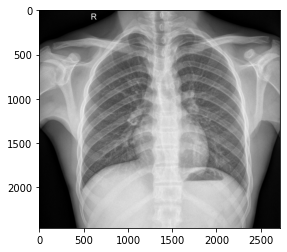

In [75]:
imagen_ejemplo = copy.copy(df['image'][18])
plt.imshow(imagen_ejemplo, cmap='gray')
plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.2251 - accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0715 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0483 - accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0310 - accuracy: 0.9903


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11089184880256653
Test accuracy: 0.9754999876022339
